In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge

In [39]:
path = r"C:\Users\zjc20\Downloads\python\X回归案例\data\Salary_Data.csv"
# 注：这里加 r（rawstring原生字符串）是为了避免与正则表达式语法冲突
data = pd.read_csv(path)
data.head() # head()是观察前5行

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [40]:
# 划分训练集和测试集
cols = data.shape[1]
X = data.iloc[:,:cols-1] # X是所有行，去掉最后一列
y = data.iloc[:,cols-1:] # y是所有行的最后一列
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,:cols-1],data.iloc[:,cols-1:],random_state=0)

In [41]:
#创建岭回归实例
clf=Ridge(alpha=1.0,fit_intercept = True)
#调用fit函数使用训练集训练回归器
clf.fit(X_train,y_train)
#利用测试集计算回归曲线的拟合优度，clf.score返回值为0.7375
#拟合优度，用于评价拟合好坏，最大为1，无最小值，当对所有输入都输出同一个值时，拟合优度为0。
clf.score(X_test,y_test)


0.977760519315693

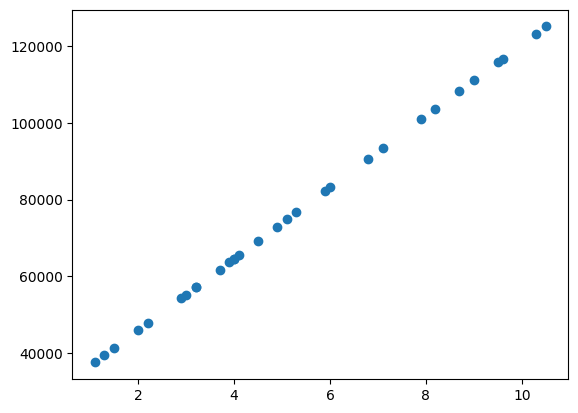

In [42]:
f = clf.predict(X)
plt.scatter(X,f)

In [43]:
def LSM(X, y):
    w = np.linalg.inv(X.T@X)@X.T@y #np.linalg.inv()：矩阵求逆，X.T@X等价于X.T.dot(X)
    return w

In [46]:
final_w2=LSM(np.array(X), np.array(y))
final_w2

array([[13254.93845442]])